In [1]:
with open('/kaggle/input/d25-rhp0/D25-3D_by_Zones_Zaxis.dat','r',encoding='utf-8') as f:
      content = f.read()

In [2]:
import pandas as pd
with open('/kaggle/input/d25-rhp0/D25-3D_by_Zones_Zaxis.dat','r') as f:
    lines = f.readlines()[2:]
data1=[[float(x) for x in line.split()]for line in lines]
df1 = pd.DataFrame(data1,columns=['pbt','rh+0','rhx0','rh+1','rhx1','rh+2','rhx2','rh+3','rhx3','rh+4','rhx4','rh+5','rhx5','rh+t','rhxt'])

In [3]:
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
from scipy import interpolate, fftpack, signal
from scipy.signal import butter, lfilter, freqz


# Constants

cm2kpc = 3.24078e-22
kpc2m  = 3.08567758128e+19 # m
D10kpc = 10.0 * kpc2m # 10 kpc in m
tenkpc = 3.08567758e18*1.e3*10.
c = 2.99792458e8 # m/s
G = 6.67430e-11 # m^3 kg^−1 s^−2
msun = 1.9885e+30 # kg
esun = msun*c**2 # J

In [4]:
#Butter Highpass Filtering
from scipy.signal import butter, lfilter, freqz
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(h, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, h)
    return y

fs=4096
cutoff=5
order=5

In [5]:
#Resample function
def sn_resample_wave(t,h,fs):
    """
    Interpolate array h to the fs sampling frequency.

    Input:
        t  - time array, in seconds
        h  - strain array to be interpolated
        fs - sampling frequency
    Output:
        t1 - time array, after resampling
        h1 - new strain array
    """

    # Quick check
    if len(t)!=len(h):
        print("Error: t and h need to have equal sizes")
        return 0

    # Define new time with fs
    t1 = np.arange(t[0],t[-1],1.0/fs)

    # Interpolation
    tck = interpolate.splrep(t,h,s=0)
    h1  = interpolate.splev(t1,tck,der=0)

    return t1, h1

In [6]:
pbt = df1['pbt'].to_numpy()
rhp0 = df1['rh+0'].to_numpy()
rhx0 = df1['rhx0'].to_numpy()
rhp1 = df1['rh+1'].to_numpy()
rhp2 = df1['rh+2'].to_numpy()
rhp3 = df1['rh+3'].to_numpy()
rhp4 = df1['rh+4'].to_numpy()
rhp5 = df1['rh+5'].to_numpy()
rhpt = df1['rh+t'].to_numpy()
rhx1 = df1['rhx1'].to_numpy()
rhx2 = df1['rhx2'].to_numpy()
rhx3 = df1['rhx3'].to_numpy()
rhx4 = df1['rhx4'].to_numpy()
rhx5 = df1['rhx5'].to_numpy()
rhxt = df1['rhxt'].to_numpy()

In [7]:
# Libraries

import numpy as np
import os, shutil
import matplotlib.pyplot as plt
from scipy import interpolate, fftpack, signal
from scipy.signal import butter, lfilter, freqz


# Constants

cm2kpc = 3.24078e-22
kpc2m  = 3.08567758128e+19 # m
D10kpc = 10.0 * kpc2m # 10 kpc in m

c = 2.99792458e8 # m/s
G = 6.67430e-11 # m^3 kg^−1 s^−2
msun = 1.9885e+30 # kg
esun = msun*c**2 # J

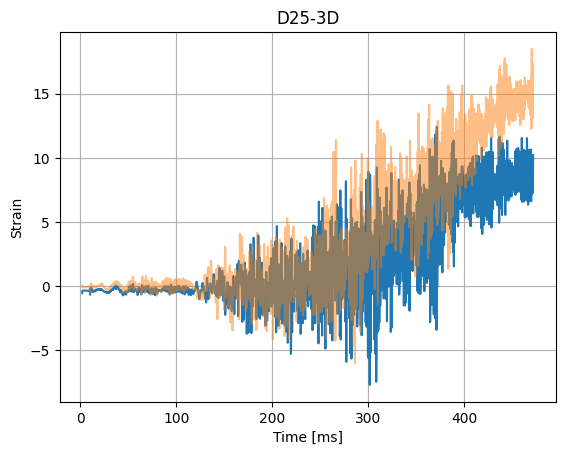

In [8]:
# Input data for region 0
name = 'D25-3D'

inFile ='/kaggle/input/d25-rhp0/D25-3D_by_Zones_Zaxis.dat'
data = np.loadtxt(inFile)

fs = 4096  # Default resampling frequency
fcut = 10 # Hz, # cut off frequencies below 10 Hz  # Highpass filter
nleft  = 0.0     # Remove edges. This step is needed because of the interpolation that does not well interpolate edges
nright = 0.0
# Default distance, 10kpc in m
D = D10kpc
(phi_eq, theta_eq) = (0.0, np.pi/2.0)

# Plot the waveforms
plt.figure()
plt.plot(pbt,rhpt,label='hplus')
plt.plot(pbt,rhxt,label='hcross',alpha=0.5)
plt.title("{0:s}".format(name))
plt.xlabel('Time [ms]')
plt.ylabel('Strain')
plt.grid()
plt.show()

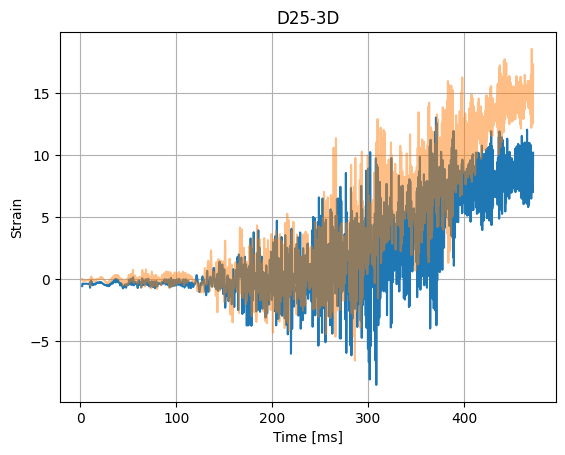

In [9]:
# Processing (resampling, removing edge artifacts) for a waveform
# to make sure the processing went well(just for clarity purposes) for region 0


# Make interpolation for the strain
t, hp  = sn_resample_wave(pbt, rhpt, fs)
t, hc  = sn_resample_wave(pbt, rhxt, fs)



# Plot the waveforms
plt.figure()
plt.plot(t,hp,label='hp equator')
plt.plot(t,hc,label='hc equator',alpha=0.5)
plt.title(name)
plt.xlabel('Time [ms]')
plt.ylabel('Strain')
plt.grid()
plt.show()

In [10]:
import numpy as np
pbt100=pbt[pbt>=100]
print(pbt100)

[100.      100.2     100.4     ... 471.60001 471.79999 472.     ]


In [11]:
import numpy as np

index = np.where(pbt == 100)[0][0]

print(index)

491


In [12]:
import numpy as np
RHP0 = (rhp0[491:])
RHP1 = (rhp1[491:])
RHP2 = (rhp2[491:])
RHP3 = (rhp3[491:])
RHP4 = (rhp4[491:])
RHP5 = (rhp5[491:])
RHPT = (rhpt[491:])
RHX0 = (rhx0[491:])
RHX1 = (rhx1[491:])
RHX2 = (rhx2[491:])
RHX3 = (rhx3[491:])
RHX4 = (rhx4[491:])
RHX5 = (rhx5[491:])
RHXT = (rhxt[491:])

In [13]:
import numpy as np
RHP0f = (rhp0[491:])/tenkpc
RHP1f = (rhp1[491:])/tenkpc
RHP2f = (rhp2[491:])/tenkpc
RHP3f = (rhp3[491:])/tenkpc
RHP4f = (rhp4[491:])/tenkpc
RHP5f = (rhp5[491:])/tenkpc
RHPTf = (rhpt[491:])/tenkpc
RHX0f = (rhx0[491:])/tenkpc
RHX1f = (rhx1[491:])/tenkpc
RHX2f = (rhx2[491:])/tenkpc
RHX3f = (rhx3[491:])/tenkpc
RHX4f = (rhx4[491:])/tenkpc
RHX5f = (rhx5[491:])/tenkpc
RHXTf = (rhxt[491:])/tenkpc

In [14]:
RHXT_f = butter_highpass_filter(RHXTf, cutoff, fs, order=5)
print(RHXT_f)

[ 9.82862398e-24  1.39475459e-23  1.49756914e-23 ... -6.61361044e-23
 -5.49217609e-23  7.28830779e-23]


In [15]:
RHPT_f = butter_highpass_filter(RHPTf, cutoff, fs, order=5)
print(RHPT_f)

[-9.86344174e-24 -5.38419542e-24 -1.49957653e-24 ... -3.40589561e-23
 -3.71359620e-23  5.84725857e-23]


In [16]:
RHP12f = RHP1f+RHP2f
RHX12f = RHX1f+RHX2f
RHP34f = RHP3f+RHP4f
RHX34f = RHX3f+RHX4f
RHP1234f = RHP1f+RHP2f+RHP3f+RHP4f
RHX1234f = RHX1f+RHX2f+RHX3f+RHX4f
print(RHXTf)
np.savetxt('D25_100_RHT_4096_hcross.txt',RHXTf, fmt='%s')
print(RHPTf)
np.savetxt('D25_100_RHT_4096_hplus.txt',RHPTf, fmt='%s')
print(RHXT_f)
np.savetxt('D25_100_RHT_f_4096_hcross.txt',RHXT_f, fmt='%s')
print(RHPT_f)
np.savetxt('D25_100_RHT_f_4096_hplus.txt',RHPT_f, fmt='%s')
print(RHP12f)
np.savetxt('D25_100_RH12_4096_hplus.txt',RHP12f, fmt='%s')
print(RHP34f)
np.savetxt('D25_100_RH34_4096_hplus.txt',RHP34f, fmt='%s')
print(RHP1234f)
np.savetxt('D25_100_RH1234_4096_hplus.txt',RHP1234f, fmt='%s')
print(RHX12f)
np.savetxt('D25_100_RH12_4096_hcross.txt',RHX12f, fmt='%s')
print(RHX34f)
np.savetxt('D25_100_RH34_4096_hcross.txt',RHX34f, fmt='%s')
print(RHX1234f)
np.savetxt('D25_100_RH1234_4096_hcross.txt',RHX1234f, fmt='%s')
print(pbt100)
np.savetxt('D25_100_pbt_4096.txt',pbt100, fmt='%s')

[9.95135921e-24 1.43687122e-23 1.57632645e-23 ... 4.24050266e-22
 4.33801480e-22 5.61856758e-22]
[-9.98661176e-24 -5.69930155e-24 -1.90455291e-24 ...  2.39563804e-22
  2.35434358e-22  3.31132911e-22]
[ 9.82862398e-24  1.39475459e-23  1.49756914e-23 ... -6.61361044e-23
 -5.49217609e-23  7.28830779e-23]
[-9.86344174e-24 -5.38419542e-24 -1.49957653e-24 ... -3.40589561e-23
 -3.71359620e-23  5.84725857e-23]
[-5.15958841e-24  9.99598814e-25  8.12355159e-24 ...  2.37247737e-23
 -6.25382319e-23  2.11831594e-23]
[ 4.58465560e-24  2.71684898e-25  1.94149189e-24 ... -9.22475338e-24
  1.97491489e-23 -1.99351376e-23]
[-5.74932813e-25  1.27128371e-24  1.00650435e-23 ...  1.45000203e-23
 -4.27890830e-23  1.24802177e-24]
[ 4.61918759e-24  9.29953744e-24  7.65262175e-24 ... -4.81760748e-23
 -4.25672195e-23  6.43250799e-23]
[-3.39105714e-24 -6.09941140e-24 -4.29928035e-24 ... -9.99970408e-24
 -7.43028226e-24  1.17987793e-23]
[ 1.22813044e-24  3.20012604e-24  3.35334139e-24 ... -5.81757789e-23
 -4.999750

In [17]:
import zipfile

file_names = ["D25_100_pbt_4096.txt", "D25_100_RHT_f_4096_hcross.txt", "D25_100_RHT_f_4096_hplus.txt", "D25_100_RH12_4096_hcross.txt", "D25_100_RH12_4096_hplus.txt", "D25_100_RH34_4096_hcross.txt", "D25_100_RH34_4096_hplus.txt", "D25_100_RH1234_4096_hcross.txt", "D25_100_RH1234_4096_hplus.txt", "D25_100_RHT_4096_hcross.txt", "D25_100_RHT_4096_hplus.txt"]

# Name of the output ZIP file
zip_file_name = "D25_100_data_4096.zip"

# Create the ZIP file and add only the specified files
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for file in file_names:
        zipf.write(file)

print(f"ZIP file '{zip_file_name}' created with files: {file_names}")

ZIP file 'D25_100_data_4096.zip' created with files: ['D25_100_pbt_4096.txt', 'D25_100_RHT_f_4096_hcross.txt', 'D25_100_RHT_f_4096_hplus.txt', 'D25_100_RH12_4096_hcross.txt', 'D25_100_RH12_4096_hplus.txt', 'D25_100_RH34_4096_hcross.txt', 'D25_100_RH34_4096_hplus.txt', 'D25_100_RH1234_4096_hcross.txt', 'D25_100_RH1234_4096_hplus.txt', 'D25_100_RHT_4096_hcross.txt', 'D25_100_RHT_4096_hplus.txt']


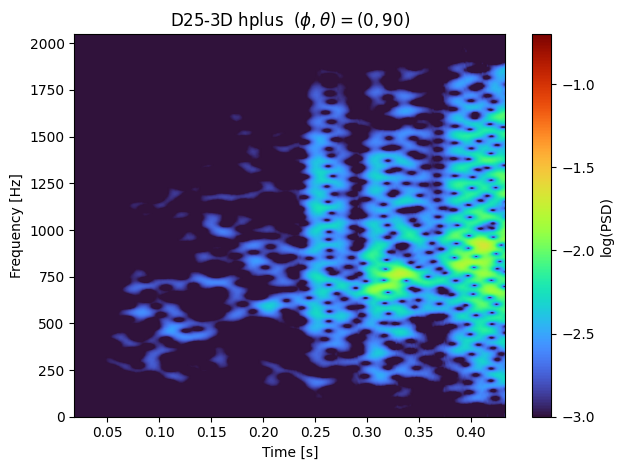

In [18]:
import numpy as np
# Spectrogram for RHP0
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP0, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd0+.png")
plt.show()

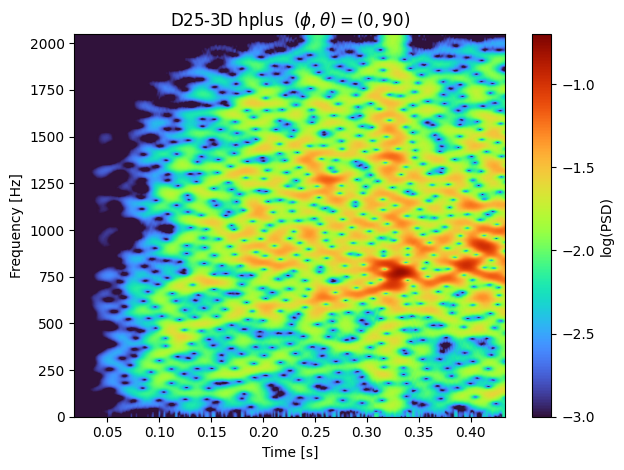

In [19]:
import numpy as np
# Spectrogram for RHP1
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP1, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd1+.png")
plt.show()

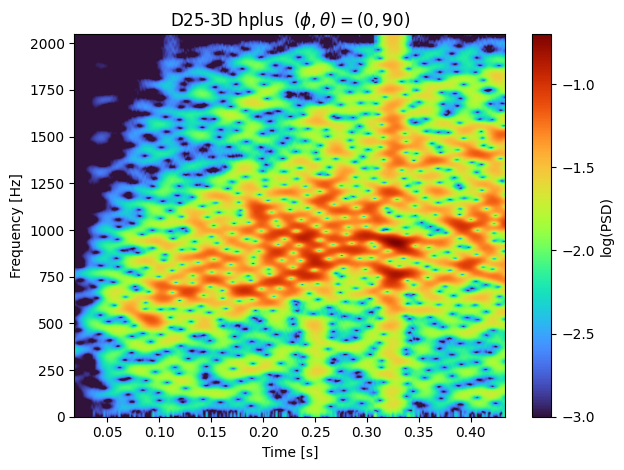

In [20]:
import numpy as np
# Spectrogram for RHP2
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP2, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd2+.png")
plt.show()

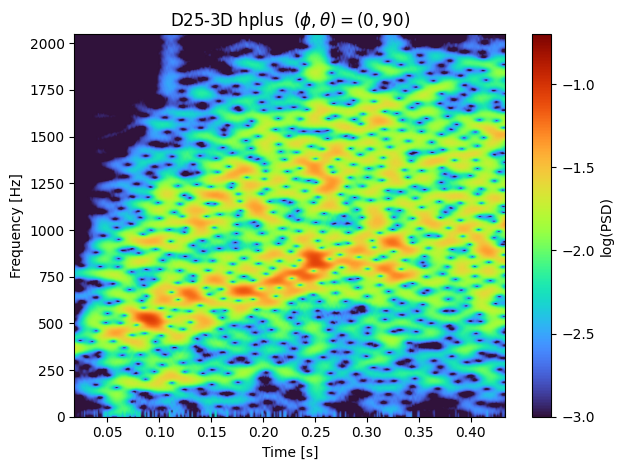

In [21]:
import numpy as np
# Spectrogram for RHP3
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP3, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd3+.png")
plt.show()

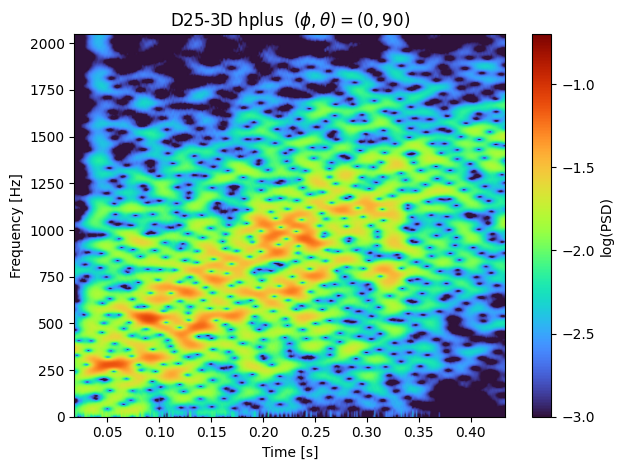

In [22]:
import numpy as np
# Spectrogram for RHP4
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP4, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd4+.png")
plt.show()

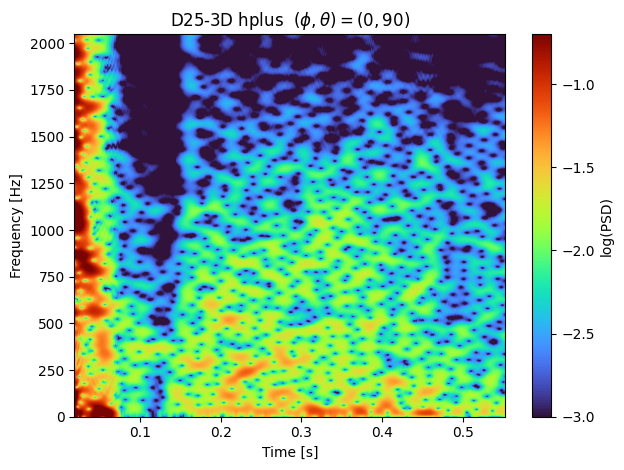

In [23]:
import numpy as np
# Spectrogram for RHP5
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rhp5, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd5+.png")
plt.show()

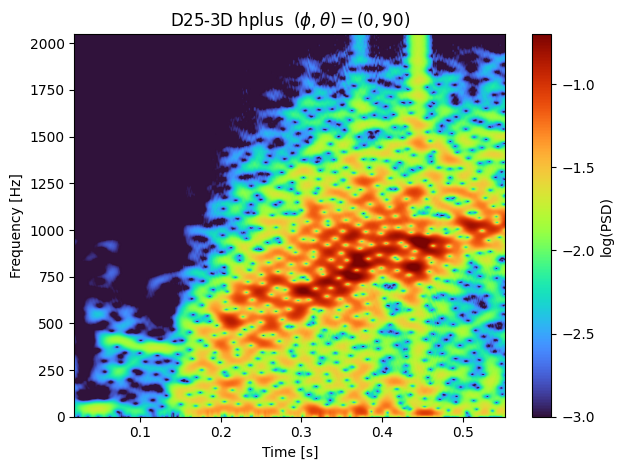

In [24]:
import numpy as np
# Spectrogram for rhpt
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rhpt, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsdt+.png")
plt.show()

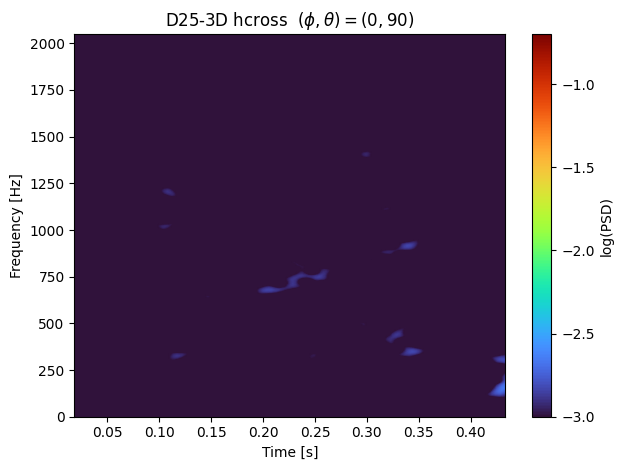

In [25]:
import numpy as np
# Spectrogram for RHX0
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX0, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd0x.png")
plt.show()

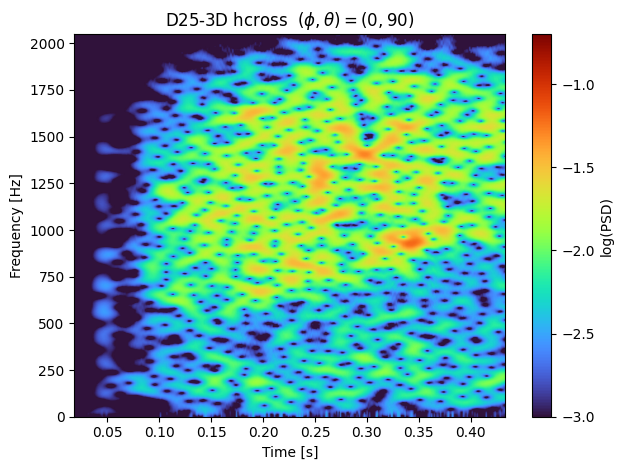

In [26]:
import numpy as np
# Spectrogram for RHX1
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX1, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd1x.png")
plt.show()

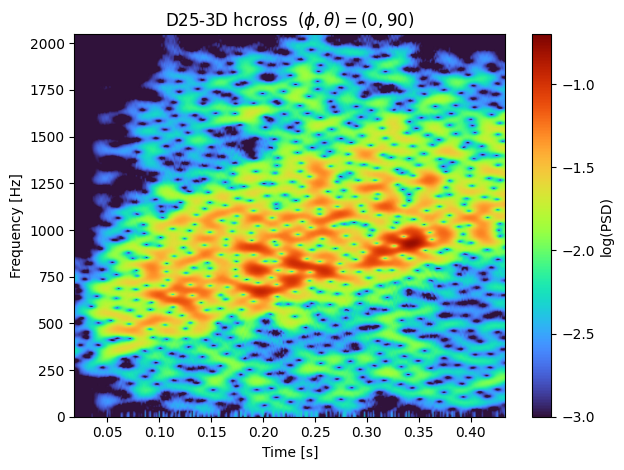

In [27]:
import numpy as np
# Spectrogram for RHX2
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX2, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd2x.png")
plt.show()

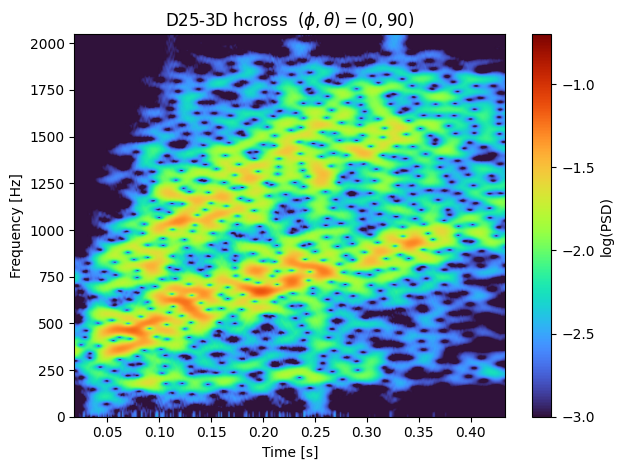

In [28]:
import numpy as np
# Spectrogram for RHX3
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX3, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd3x.png")
plt.show()

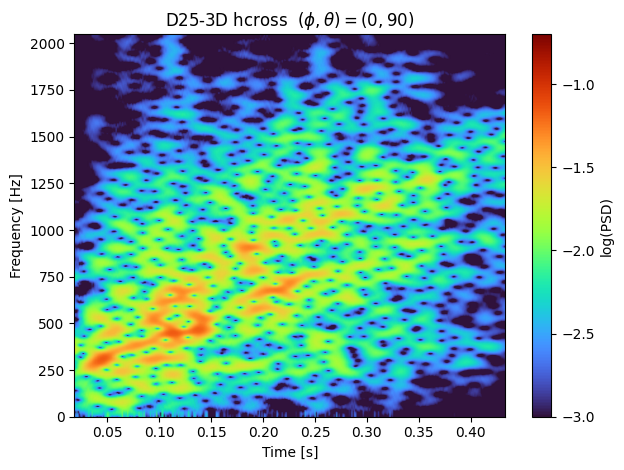

In [29]:
import numpy as np
# Spectrogram for RHX4
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX4, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd4x.png")
plt.show()

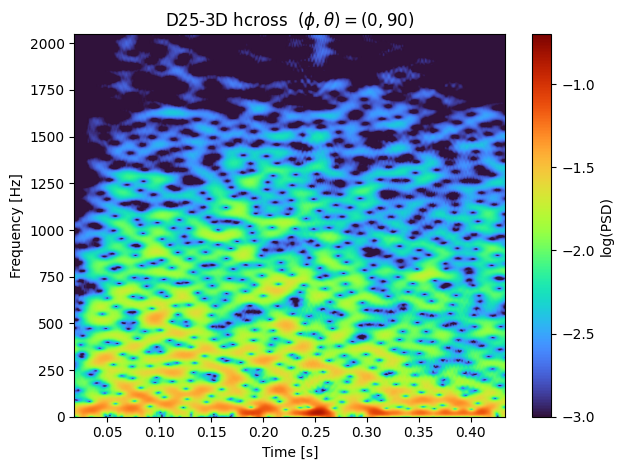

In [30]:
import numpy as np
# Spectrogram for RHX5
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX5, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd5x.png")
plt.show()

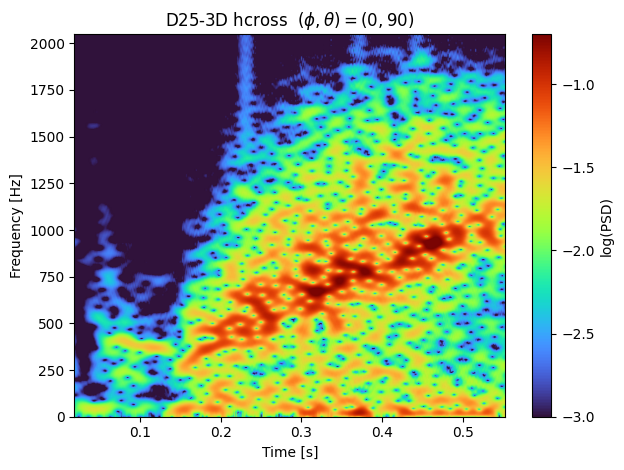

In [31]:
import numpy as np
# Spectrogram for rhxt
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rhxt, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsdtx.png")
plt.show()

# **Combos** 

In [32]:
rh = rhpt+rhxt
RH = RHPT+RHXT
print(rh)
print(RH)

[-0.52220585 -0.45670049 -0.45536622 ... 20.4769906  20.6504602
 27.554782  ]
[-1.08778000e-03  2.67510060e-01  4.27635158e-01 ...  2.04769906e+01
  2.06504602e+01  2.75547820e+01]


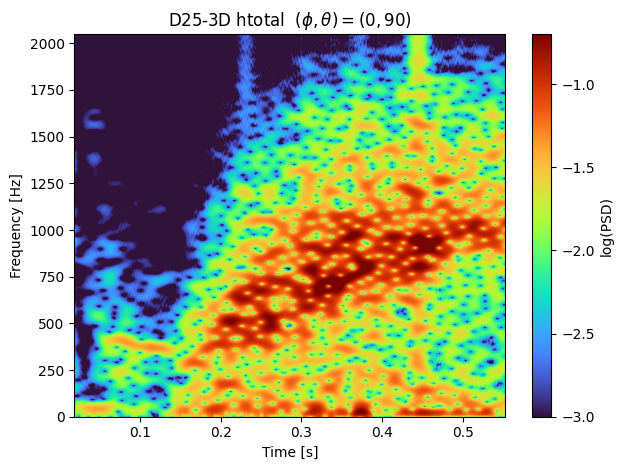

In [33]:
import numpy as np
# Spectrogram for Total GW signal(after 0ms)
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rh, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} htotal  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_total.png")
plt.show()

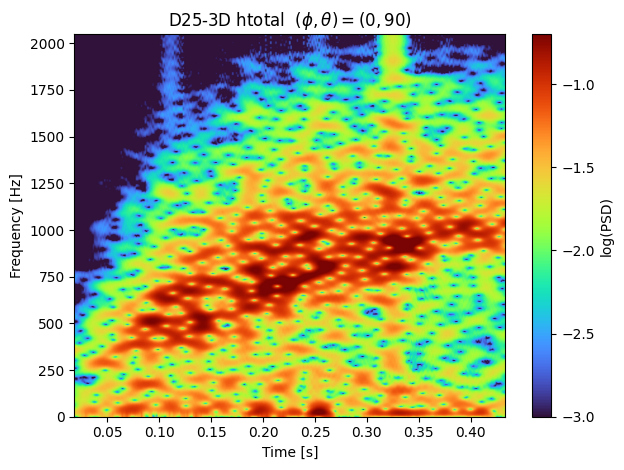

In [34]:
import numpy as np
# Spectrogram for Total GW signal(after 100ms)
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} htotal  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_total.png")
plt.show()

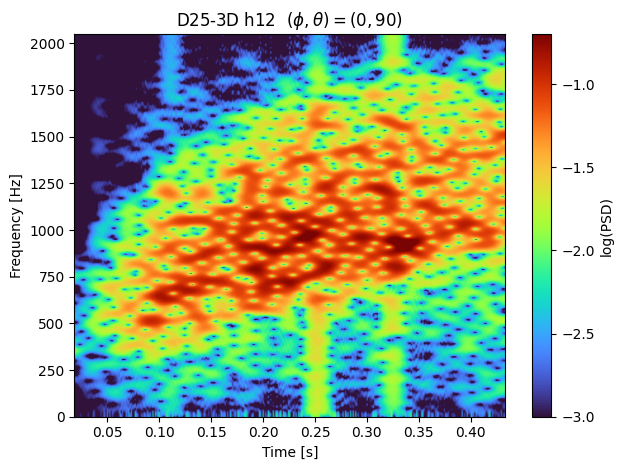

In [35]:
import numpy as np
# Spectrogram for RH12
# Computation WILL take a while
RH12 = RHP1+RHP2+RHX1+RHX2
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH12, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} h12  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_12.png")
plt.show()

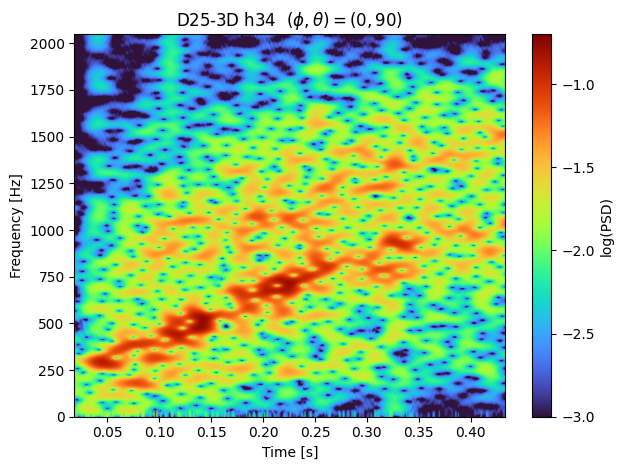

In [36]:
import numpy as np
# Spectrogram for RH34
# Computation WILL take a while
RH34 = RHP3+RHP4+RHX3+RHX4
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH34, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} h34  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_34.png")
plt.show()

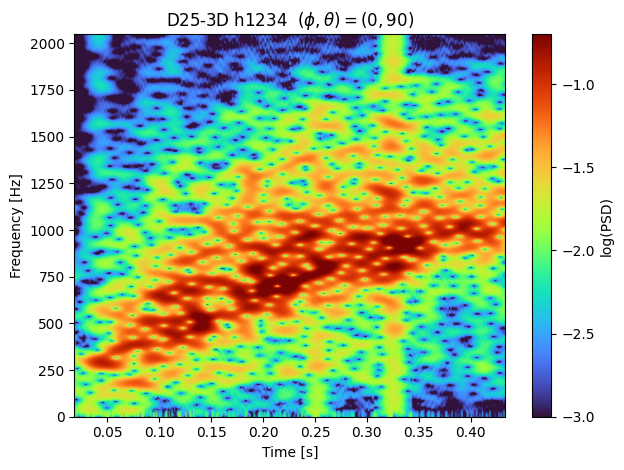

In [37]:
import numpy as np
# Spectrogram for RHS
# Computation WILL take a while
RHS = RHP3+RHP4+RHX3+RHX4+RHP2+RHP1+RHX2+RHX1
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHS, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-3.0,vmax=-0.7)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} h1234  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_Sum.png")
plt.show()

# ** Amplitude Combos** 

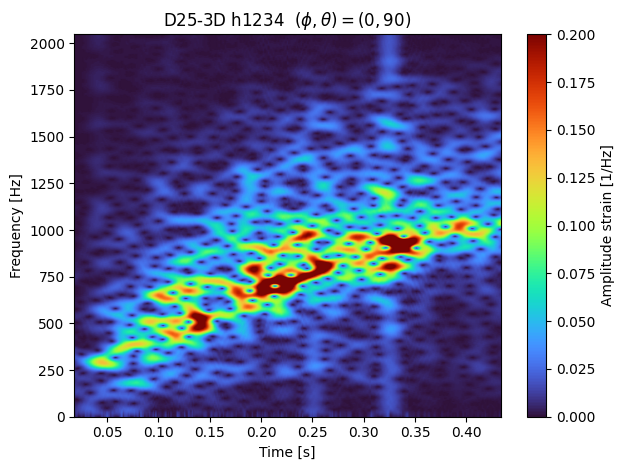

In [38]:
import numpy as np
# Spectrogram for RHS
# Computation WILL take a while
RHS = RHP3+RHP4+RHX3+RHX4+RHP2+RHP1+RHX2+RHX1
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHS, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

plt.figure()
plt.pcolormesh(txx, fxx, Sxx, shading='gouraud', cmap='turbo' ,vmin=0,vmax=0.2)
cbar = plt.colorbar()
cbar.set_label('Amplitude strain [1/Hz]')
plt.ylim([0,2048])
plt.title(r"{0:s} h1234  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_A100_Sum_.png")
plt.show()

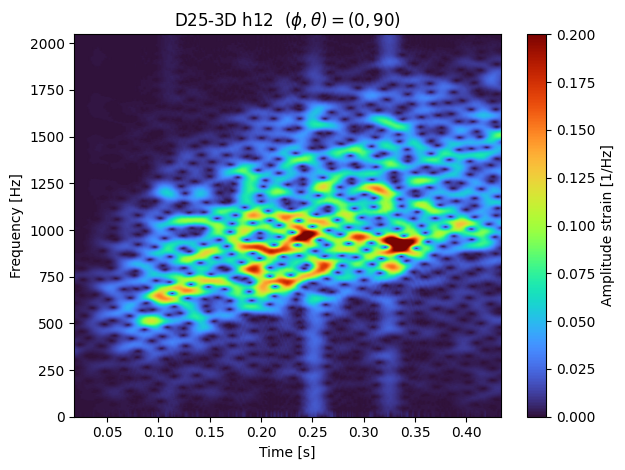

In [39]:
import numpy as np
# Spectrogram for RH12
# Computation WILL take a while
RH12 = RHP2+RHP1+RHX2+RHX1
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH12, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

plt.figure()
plt.pcolormesh(txx, fxx, Sxx, shading='gouraud', cmap='turbo' ,vmin=0,vmax=0.2)
cbar = plt.colorbar()
cbar.set_label('Amplitude strain [1/Hz]')
plt.ylim([0,2048])
plt.title(r"{0:s} h12  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_A100_12.png")
plt.show()

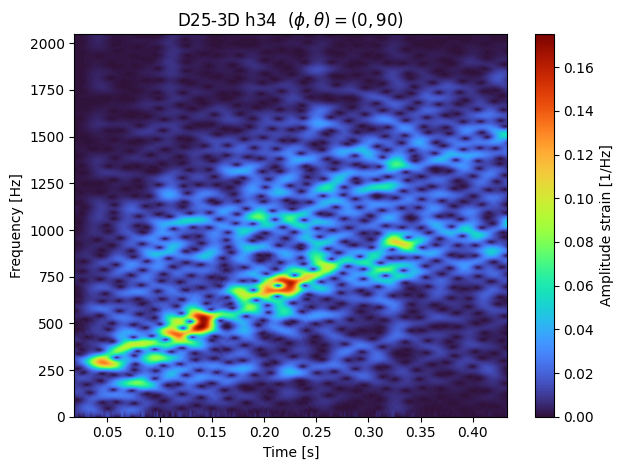

In [40]:
import numpy as np
# Spectrogram for RH34
# Computation WILL take a while
RH34 = RHP3+RHP4+RHX3+RHX4
wnd="hamming"
nfft=4*512
nperseg=150
noverlap=145
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH34, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

plt.figure()
plt.pcolormesh(txx, fxx, Sxx, shading='gouraud', cmap='turbo' ,vmin=0,vmax=0.175)
cbar = plt.colorbar()
cbar.set_label('Amplitude strain [1/Hz]')
plt.ylim([0,2048])
plt.title(r"{0:s} h34  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_A100_34.png")
plt.show()

In [41]:
tenkpc = 3.08567758e18*1.e3*10.
RH12f = RH12/tenkpc
RH34f = RH34/tenkpc
RHSf = RHS/tenkpc
RHf = RH/tenkpc
print(RH12f)
print(RH34f)
print(RHSf)
print(RHf)

[-5.40400828e-25  1.02991363e-23  1.57761733e-23 ... -2.44513011e-23
 -1.05105451e-22  8.55082393e-23]
[ 1.19359846e-24 -5.82772650e-24 -2.35778846e-24 ... -1.92244575e-23
  1.23188666e-23 -8.13635827e-24]
[ 6.53197629e-25  4.47140975e-24  1.34183849e-23 ... -4.36757586e-23
 -9.27865848e-23  7.73718811e-23]
[-3.52525490e-26  8.66941063e-24  1.38587116e-23 ...  6.63614071e-22
  6.69235838e-22  8.92989669e-22]


In [42]:
print(RH12f)
np.savetxt('D25_100_RH12_4096.txt', RH12f, fmt='%s')

[-5.40400828e-25  1.02991363e-23  1.57761733e-23 ... -2.44513011e-23
 -1.05105451e-22  8.55082393e-23]


In [43]:
print(RH34f)
np.savetxt('D25_100_RH34_4096.txt', RH34f, fmt='%s')

[ 1.19359846e-24 -5.82772650e-24 -2.35778846e-24 ... -1.92244575e-23
  1.23188666e-23 -8.13635827e-24]


In [44]:
print(RHSf)
np.savetxt('D25_100_RH1234_4096.txt',RHSf, fmt='%s')

[ 6.53197629e-25  4.47140975e-24  1.34183849e-23 ... -4.36757586e-23
 -9.27865848e-23  7.73718811e-23]


In [45]:
print(RHf)
np.savetxt('D25_100_RHT_4096.txt',RHf, fmt='%s')

[-3.52525490e-26  8.66941063e-24  1.38587116e-23 ...  6.63614071e-22
  6.69235838e-22  8.92989669e-22]


In [46]:
print(pbt100)
np.savetxt('D25_100_pbt_4096.txt',pbt100, fmt='%s')

[100.      100.2     100.4     ... 471.60001 471.79999 472.     ]
